In [1]:
from loader import loadData
import pandas as pd
import matplotlib.pyplot as plt



Load the data

In [2]:
df = loadData()
print(len(df))

50000


Look at the data


In [3]:
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/26/2019 17:41,389.0,4/29/2019 7:59,353.0,224291.0,2.082015e+14,3.378800e+10,3.584911e+13,L41353A,...,9081833.0,16287753.0,52837.0,17851342.0,437999645.0,9032006.0,782941030.0,14711262.0,60846518.0,453192205.0
1,1.311448e+19,4/26/2019 17:41,789.0,4/29/2019 9:18,635.0,229041.0,2.082017e+14,3.367736e+10,3.526021e+13,T93933A,...,22848427.0,4757399.0,21756262.0,12864097.0,229626791.0,3081834.0,391501005.0,571681.0,25384901.0,285060305.0
2,7.349883e+18,4/26/2019 17:41,274.0,4/29/2019 9:38,148.0,230219.0,2.082009e+14,3.376352e+10,3.518231e+13,D17510A,...,13349451.0,15196887.0,20821712.0,234041.0,144439020.0,12208727.0,707974489.0,13451904.0,44089068.0,190640761.0
3,7.349883e+18,4/26/2019 17:41,646.0,4/29/2019 8:45,189.0,226999.0,2.082010e+14,3.369879e+10,3.556241e+13,D10661B,...,17740408.0,6004224.0,20099703.0,18699359.0,523193441.0,16119310.0,473340487.0,8701003.0,50161071.0,566295159.0
4,7.277826e+18,4/26/2019 17:41,934.0,4/29/2019 14:36,502.0,248102.0,2.082015e+14,3.366483e+10,3.552301e+13,D22447B,...,1613966.0,14033489.0,4240155.0,14295528.0,79838922.0,2827398.0,17940144.0,7069891.0,41307375.0,96538515.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 55 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Bearer Id                                 49872 non-null  float64
 1   Start                                     49999 non-null  object 
 2   Start ms                                  49999 non-null  float64
 3   End                                       49999 non-null  object 
 4   End ms                                    49999 non-null  float64
 5   Dur. (ms)                                 49999 non-null  float64
 6   IMSI                                      49894 non-null  float64
 7   MSISDN/Number                             49802 non-null  float64
 8   IMEI                                      49894 non-null  float64
 9   Last Location Name                        49850 non-null  object 
 10  Avg RTT DL (ms)                   

In [5]:
df.isna().sum()

Bearer Id                                     128
Start                                           1
Start ms                                        1
End                                             1
End ms                                          1
Dur. (ms)                                       1
IMSI                                          106
MSISDN/Number                                 198
IMEI                                          106
Last Location Name                            150
Avg RTT DL (ms)                             11068
Avg RTT UL (ms)                             11058
Avg Bearer TP DL (kbps)                         1
Avg Bearer TP UL (kbps)                         1
TCP DL Retrans. Vol (Bytes)                 31883
TCP UL Retrans. Vol (Bytes)                 33852
DL TP < 50 Kbps (%)                           198
50 Kbps < DL TP < 250 Kbps (%)                198
250 Kbps < DL TP < 1 Mbps (%)                 198
DL TP > 1 Mbps (%)                            198


In [6]:
df.describe()

,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,4.987200e+04,49999.000000,49999.000000,4.999900e+04,4.989400e+04,4.980200e+04,4.989400e+04,38932.000000,38942.000000,49999.000000,...,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,4.999900e+04,4.999900e+04
mean,1.014501e+19,497.565051,498.733635,1.290063e+05,2.082016e+14,5.815903e+10,4.958217e+13,85.056714,19.857275,13018.963879,...,1.167500e+07,1.103995e+07,1.157934e+07,1.099685e+07,4.214914e+08,8.279179e+06,4.225596e+08,8.272616e+06,4.114234e+07,4.540935e+08
std,2.891503e+18,288.097202,288.003771,7.110660e+04,1.865172e+10,4.232367e+12,2.297626e+13,330.400904,98.608596,24535.982176,...,6.714660e+06,6.349360e+06,6.715904e+06,6.357083e+06,2.436439e+08,4.781679e+06,2.427236e+08,4.770381e+06,1.122772e+07,2.437211e+08
min,6.917538e+18,0.000000,0.000000,1.189200e+04,2.040471e+14,3.360100e+10,4.400152e+11,0.000000,0.000000,0.000000,...,5.300000e+01,1.610000e+02,5.440000e+02,3.500000e+01,5.087800e+04,4.790000e+02,3.290000e+03,1.480000e+02,2.866892e+06,7.114041e+06
25%,7.349883e+18,249.000000,249.000000,8.639900e+04,2.082014e+14,3.365277e+10,3.546261e+13,31.000000,2.000000,39.000000,...,5.879172e+06,5.550084e+06,5.770992e+06,5.491417e+06,2.102036e+08,4.132944e+06,2.133939e+08,4.144658e+06,3.328869e+07,2.427610e+08
50%,7.349883e+18,497.000000,501.000000,1.053480e+05,2.082015e+14,3.366394e+10,3.572991e+13,44.000000,5.000000,57.000000,...,1.163801e+07,1.102046e+07,1.152294e+07,1.097152e+07,4.235194e+08,8.270190e+06,4.227483e+08,8.293570e+06,4.118132e+07,4.561354e+08
75%,1.311448e+19,746.000000,745.000000,1.549115e+05,2.082018e+14,3.368494e+10,8.634410e+13,69.000000,18.000000,18915.000000,...,1.752423e+07,1.655814e+07,1.740680e+07,1.650853e+07,6.317011e+08,1.241615e+07,6.334446e+08,1.238717e+07,4.903782e+07,6.639550e+08
max,1.318654e+19,999.000000,999.000000,1.859336e+06,2.082099e+14,8.823971e+14,9.900120e+13,25873.000000,5607.000000,378160.000000,...,2.325829e+07,2.201146e+07,2.325919e+07,2.201189e+07,8.434333e+08,1.655820e+07,8.434385e+08,1.655882e+07,7.739029e+07,8.979982e+08


Handling missing data

In [7]:
# how many missing values exist or better still what is the % of missing values in the dataset?
def percent_missing(df):

    # Calculate total number of cells in dataframe
    totalCells = df.shape[0] * df.shape[1]

    # Count number of missing values per column
    missingCount = df.isnull().sum()

    # Calculate total number of missing values
    totalMissing = missingCount.sum()

    # Calculate percentage of missing values
    print("The dataset contains", round(((totalMissing/totalCells) * 100), 2), "%", "missing values.")

In [8]:
percent_missing(df)

The dataset contains 13.19 % missing values.


In [9]:
df.isna().sum()

Bearer Id                                     128
Start                                           1
Start ms                                        1
End                                             1
End ms                                          1
Dur. (ms)                                       1
IMSI                                          106
MSISDN/Number                                 198
IMEI                                          106
Last Location Name                            150
Avg RTT DL (ms)                             11068
Avg RTT UL (ms)                             11058
Avg Bearer TP DL (kbps)                         1
Avg Bearer TP UL (kbps)                         1
TCP DL Retrans. Vol (Bytes)                 31883
TCP UL Retrans. Vol (Bytes)                 33852
DL TP < 50 Kbps (%)                           198
50 Kbps < DL TP < 250 Kbps (%)                198
250 Kbps < DL TP < 1 Mbps (%)                 198
DL TP > 1 Mbps (%)                            198


In [10]:
def column_percent_missing(df, column_name):

    # Calculate total number of cells in the column
    total_cells = df[column_name].shape[0]

    # Count number of missing values in the column
    missing_count = df[column_name].isnull().sum()

    # Calculate percentage of missing values
    percentage_missing = (missing_count / total_cells) * 100

    print("The column '", column_name, "' contains", round(percentage_missing, 2), "%", "missing values.")


In [57]:
column_percent_missing(df , 'TCP UL Retrans. Vol (Bytes)')

The column ' TCP UL Retrans. Vol (Bytes) ' contains 0.0 % missing values.


TASK 2 USER OVERVIEW ANALYSIS   

Top 10 Handsets

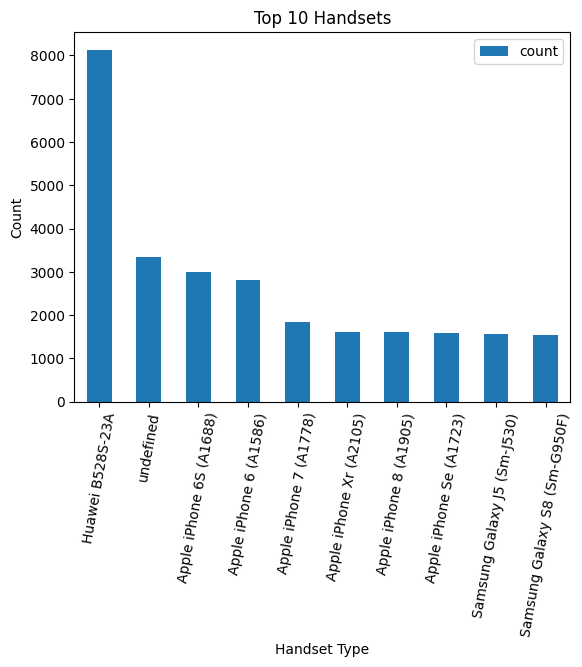

In [12]:

value_counts = df['Handset Type'].value_counts()[:10]
top_10_handsets = value_counts.index.tolist()
#print(value_counts)
#print(top_10_handsets)

top_10_df = pd.DataFrame(value_counts)
top_10_df.plot(kind= 'bar',rot=80)
plt.xlabel('Handset Type')
plt.ylabel('Count')
plt.title('Top 10 Handsets')
plt.show(10)





The top 3 handset manufacturers

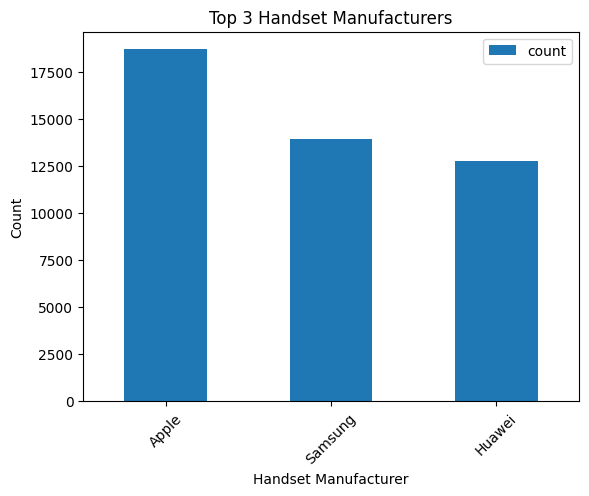

In [13]:
value_counts = df['Handset Manufacturer'].value_counts()[:3]
top_3_manufacturers = value_counts.index.tolist()

top_3_df = pd.DataFrame(value_counts)
top_3_df.plot(kind='bar', rot=45)

plt.xlabel('Handset Manufacturer')
plt.ylabel('Count')
plt.title('Top 3 Handset Manufacturers')
plt.show()


Top 5 handsets per top 3 manufacturer

Handset Type
Apple iPhone 6S (A1688)    2984
Apple iPhone 6 (A1586)     2812
Apple iPhone 7 (A1778)     1851
Apple iPhone Xr (A2105)    1608
Apple iPhone 8 (A1905)     1599
Name: count, dtype: int64


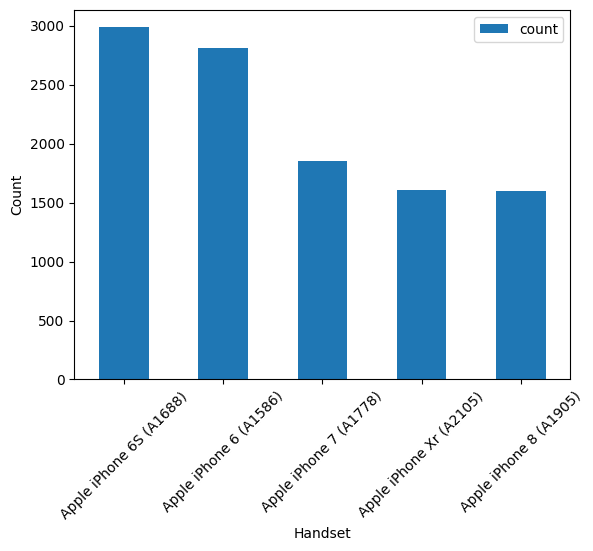

Handset Type
Samsung Galaxy J5 (Sm-J530)     1553
Samsung Galaxy S8 (Sm-G950F)    1529
Samsung Galaxy A5 Sm-A520F      1304
Samsung Galaxy J3 (Sm-J330)     1232
Samsung Galaxy S7 (Sm-G930X)    1051
Name: count, dtype: int64


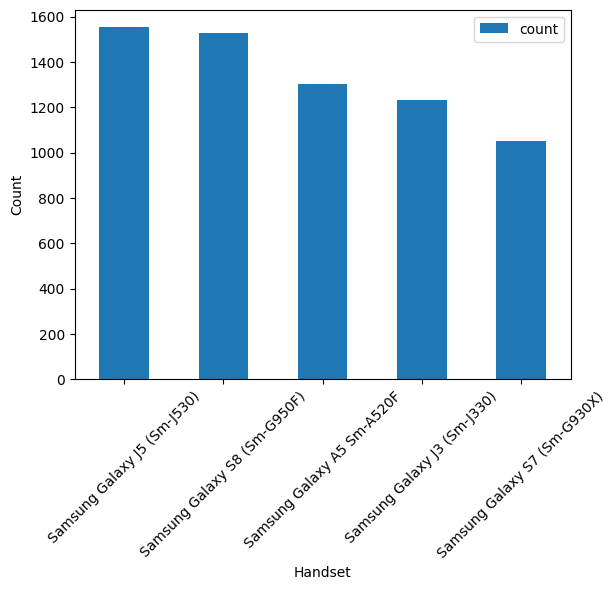

Handset Type
Huawei B528S-23A                  8135
Huawei E5180                       790
Huawei P20 Lite Huawei Nova 3E     672
Huawei P20                         507
Huawei P20 Pro                     339
Name: count, dtype: int64


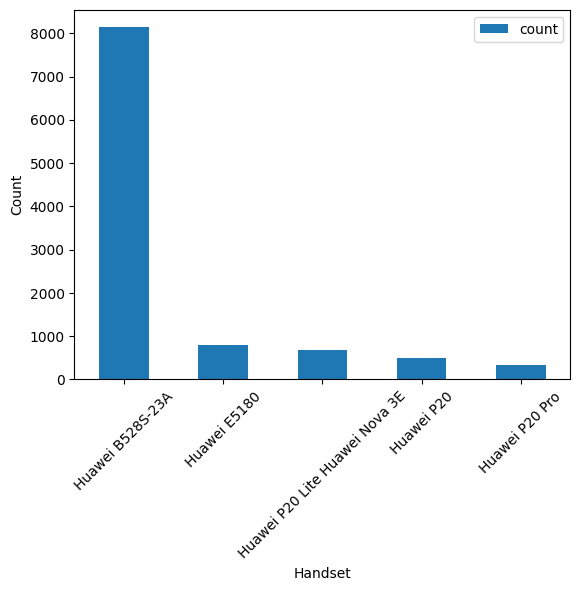

['Apple iPhone 6S (A1688)', 'Apple iPhone 6 (A1586)', 'Apple iPhone 7 (A1778)', 'Apple iPhone Xr (A2105)', 'Apple iPhone 8 (A1905)', 'Samsung Galaxy J5 (Sm-J530)', 'Samsung Galaxy S8 (Sm-G950F)', 'Samsung Galaxy A5 Sm-A520F', 'Samsung Galaxy J3 (Sm-J330)', 'Samsung Galaxy S7 (Sm-G930X)', 'Huawei B528S-23A', 'Huawei E5180', 'Huawei P20 Lite Huawei Nova 3E', 'Huawei P20', 'Huawei P20 Pro']


In [14]:
top_5_handsets = []
all_top_handsets = []
for manufacturer in top_3_manufacturers:
    manufacturer_df = df[df['Handset Manufacturer'] == manufacturer]
    handset_counts = manufacturer_df['Handset Type'].value_counts()[:5]
    all_top_handsets.append(handset_counts)
    top_5_handsets.extend(handset_counts.index.tolist())
for top_handsets in all_top_handsets:
    print(top_handsets)
    top_handsets_df = pd.DataFrame(top_handsets)
    top_handsets_df.plot(kind='bar', rot=45)
    plt.xlabel('Handset')
    plt.ylabel('Count')
    plt.title('')
    plt.show()
    
print(top_5_handsets)



Number of xdr sessions

In [15]:

xdr_sessions_aggregate = df.groupby("MSISDN/Number").agg({"Google DL (Bytes)": "count", 
                                                            "Google UL (Bytes)":"count",
                                                            "Email DL (Bytes)": "count",
                                                            "Email UL (Bytes)": "count",
                                                            "Youtube DL (Bytes)": "count",
                                                            "Youtube UL (Bytes)": "count",
                                                            "Netflix DL (Bytes)": "count",
                                                            "Netflix UL (Bytes)": "count",
                                                            "Gaming DL (Bytes)": "count",
                                                            "Gaming UL (Bytes)": "count",
                                                            "Other DL (Bytes)": "count",
                                                            "Other UL (Bytes)": "count",
                                                            })

xdr_sessions_aggregate.head()


,Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes)
MSISDN/Number,,,,,,,,,,,,
3.360100e+10,1,1,1,1,1,1,1,1,1,1,1,1
3.360100e+10,1,1,1,1,1,1,1,1,1,1,1,1
3.360101e+10,2,2,2,2,2,2,2,2,2,2,2,2
3.360101e+10,1,1,1,1,1,1,1,1,1,1,1,1
3.360103e+10,2,2,2,2,2,2,2,2,2,2,2,2


Session duration

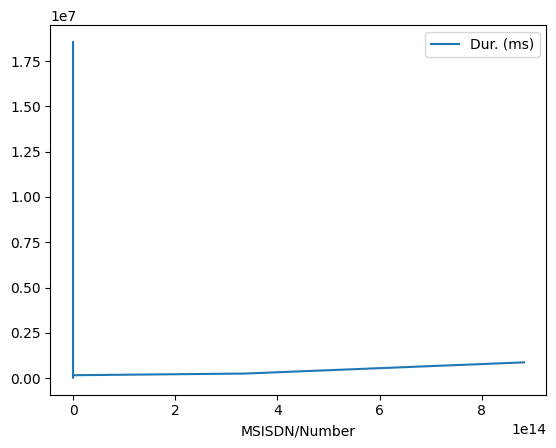

In [16]:
df.columns
xdr_sessions_duration = df.groupby("MSISDN/Number").agg({"Dur. (ms)":"sum"})
xdr_sessions_duration.head()
xdr_sessions_duration.plot()
plt.show()

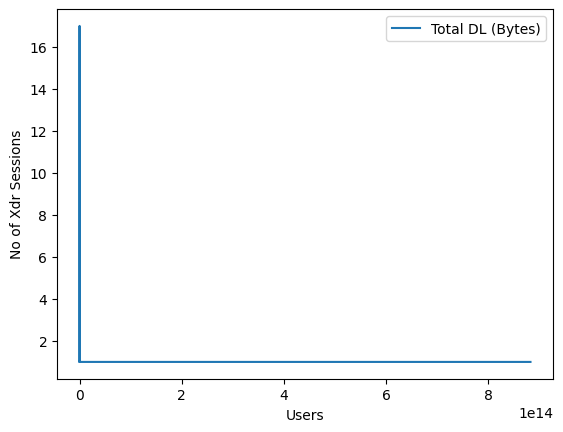

In [17]:
df.head()
aggregated_data = df.groupby("MSISDN/Number").agg({"Total DL (Bytes)": "count"})
aggregated_data.head(10)
aggregated_data.plot()
plt.ylabel("No of Xdr Sessions")
plt.xlabel("Users")
plt.show()


Total DL per user

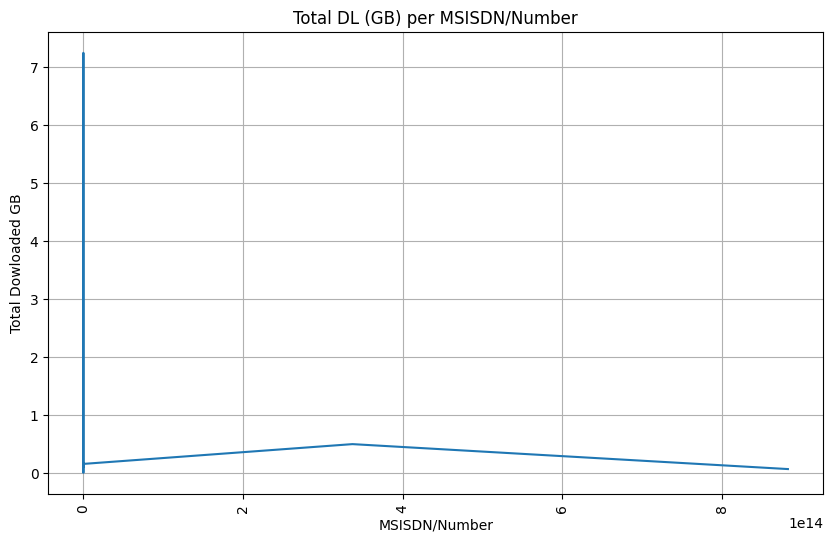

In [18]:
df.head()
aggregated_data = df.groupby("MSISDN/Number").agg({"Total DL (Bytes)": "sum"})
aggregated_data['Total DL (GB)'] = aggregated_data['Total DL (Bytes)'] / 1073741824
plt.figure(figsize=(10, 6))
plt.plot(aggregated_data.index, aggregated_data['Total DL (GB)'])
plt.xlabel('MSISDN/Number')
plt.ylabel('Total Dowloaded GB')
plt.title('Total DL (GB) per MSISDN/Number')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

Total UL per user

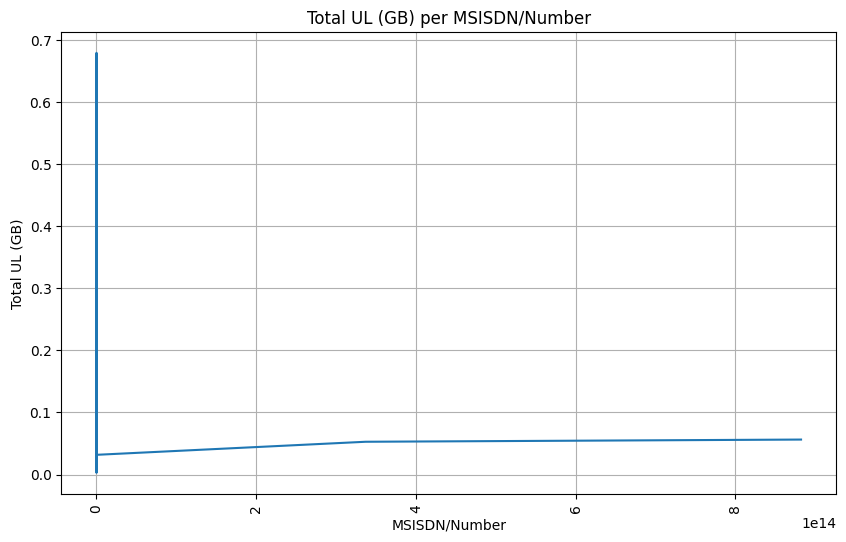

In [19]:
df.head()
aggregated_data = df.groupby("MSISDN/Number").agg({"Total UL (Bytes)": "sum"})
aggregated_data['Total UL (GB)'] = aggregated_data['Total UL (Bytes)'] / 1073741824
plt.figure(figsize=(10, 6))
plt.plot(aggregated_data.index, aggregated_data['Total UL (GB)'])
plt.xlabel('MSISDN/Number')
plt.ylabel('Total UL (GB)')
plt.title('Total UL (GB) per MSISDN/Number')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

User Engagement Task 3

In [20]:
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/26/2019 17:41,389.0,4/29/2019 7:59,353.0,224291.0,2.082015e+14,3.378800e+10,3.584911e+13,L41353A,...,9081833.0,16287753.0,52837.0,17851342.0,437999645.0,9032006.0,782941030.0,14711262.0,60846518.0,453192205.0
1,1.311448e+19,4/26/2019 17:41,789.0,4/29/2019 9:18,635.0,229041.0,2.082017e+14,3.367736e+10,3.526021e+13,T93933A,...,22848427.0,4757399.0,21756262.0,12864097.0,229626791.0,3081834.0,391501005.0,571681.0,25384901.0,285060305.0
2,7.349883e+18,4/26/2019 17:41,274.0,4/29/2019 9:38,148.0,230219.0,2.082009e+14,3.376352e+10,3.518231e+13,D17510A,...,13349451.0,15196887.0,20821712.0,234041.0,144439020.0,12208727.0,707974489.0,13451904.0,44089068.0,190640761.0
3,7.349883e+18,4/26/2019 17:41,646.0,4/29/2019 8:45,189.0,226999.0,2.082010e+14,3.369879e+10,3.556241e+13,D10661B,...,17740408.0,6004224.0,20099703.0,18699359.0,523193441.0,16119310.0,473340487.0,8701003.0,50161071.0,566295159.0
4,7.277826e+18,4/26/2019 17:41,934.0,4/29/2019 14:36,502.0,248102.0,2.082015e+14,3.366483e+10,3.552301e+13,D22447B,...,1613966.0,14033489.0,4240155.0,14295528.0,79838922.0,2827398.0,17940144.0,7069891.0,41307375.0,96538515.0


TASK 3 USER ENGAGEMENT ANALYSIS

Engagement metrics dataframe

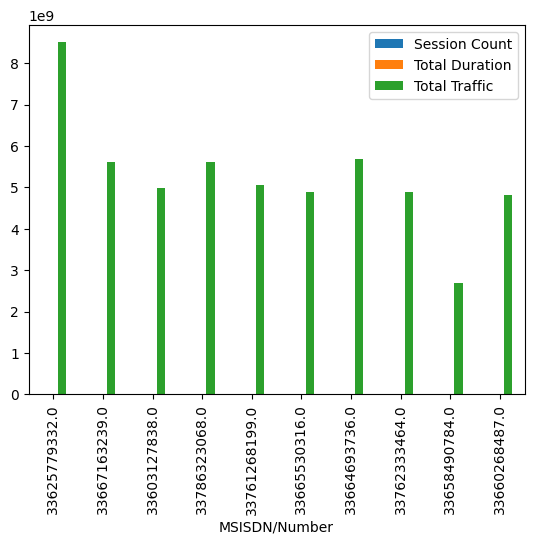

In [21]:
users_session = df.groupby("MSISDN/Number").agg({"Dur. (ms)": ["count","sum"],
                                                            "Total DL (Bytes)":"sum",
                                                            "Total UL (Bytes)":"sum"}).reset_index()
users_session.columns =  ['MSISDN/Number', 'Session Count', 'Total Duration', 'Total DL (Bytes)', 'Total UL (Bytes)'] 
users_session['Total Traffic'] = users_session['Total DL (Bytes)'] + users_session['Total UL (Bytes)']
users_session = users_session.drop(columns = ["Total DL (Bytes)","Total UL (Bytes)"])
top_10_users_session = users_session.sort_values("Session Count", ascending=False)[:10]
#top_10_users_session = top_10_users_session.drop(columns=["Total DL (Bytes)","Total UL (Bytes)"])
top_10_users_session.plot(x='MSISDN/Number', y=['Session Count', 'Total Duration', 'Total Traffic'], kind='bar')
plt.show()

top 10 users by session Count

<Axes: xlabel='MSISDN/Number'>

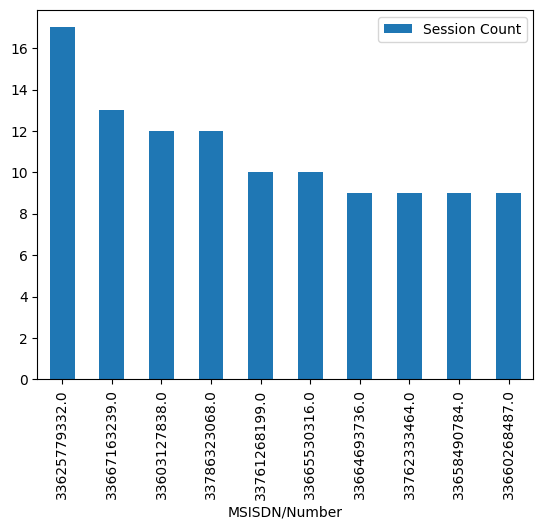

In [22]:
top_10_by_session_count = users_session.sort_values("Session Count", ascending=False)[:10]
top_10_by_session_count.plot(kind='bar', x="MSISDN/Number",y="Session Count")

top 10 users with Sessions duration


<Axes: xlabel='MSISDN/Number'>

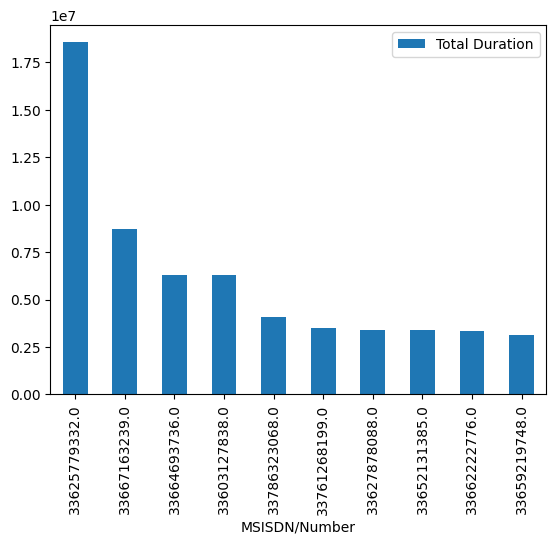

In [23]:
top_10_by_session_duration = users_session.sort_values("Total Duration", ascending=False)[:10]
top_10_by_session_duration.plot(kind='bar', x="MSISDN/Number",y="Total Duration")

Top 10 users by total traffic DL + UL

<Axes: xlabel='MSISDN/Number'>

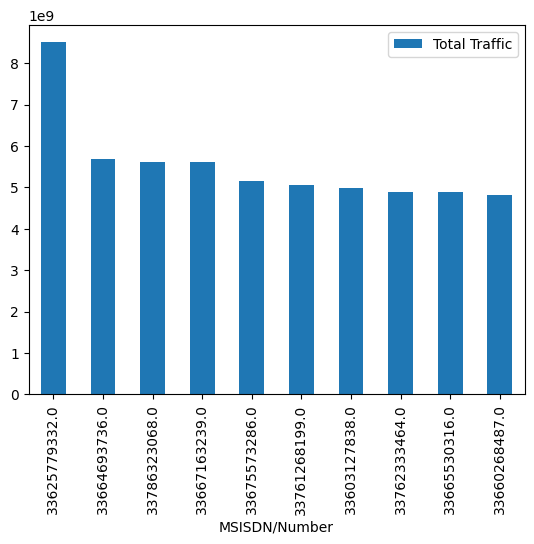

In [24]:
top_10_by_total_traffic = users_session.sort_values("Total Traffic", ascending=False)[:10]
top_10_by_total_traffic.plot(kind='bar', x="MSISDN/Number",y="Total Traffic")

Normalize

In [25]:
from sklearn.preprocessing import MinMaxScaler
columns_to_normalize = ["Session Count","Total Duration","Total Traffic"]
scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(users_session[columns_to_normalize]), columns=columns_to_normalize, index=users_session.index)
df_normalized = pd.concat([df_normalized, users_session.drop(columns=columns_to_normalize)], axis=1)
df_normalized.head()

,Session Count,Total Duration,Total Traffic,MSISDN/Number
0,0.0000,0.009133,0.014055,3.360100e+10
1,0.0000,0.006638,0.065949,3.360100e+10
2,0.0625,0.006281,0.072892,3.360101e+10
3,0.0000,0.007764,0.036262,3.360101e+10
4,0.0625,0.011588,0.128217,3.360103e+10


K-means

d:\10academy\week 1\tellco1\tellco\myvenv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


40901


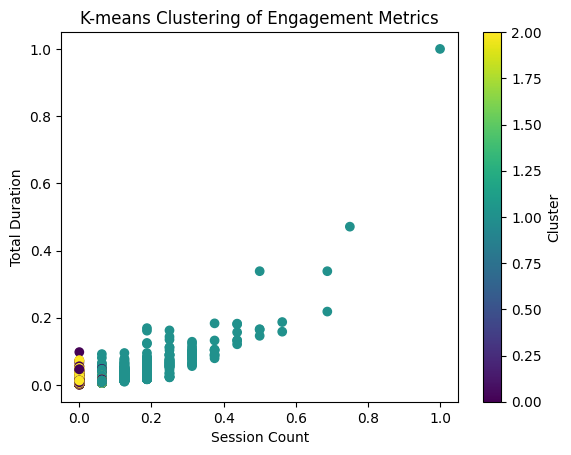

In [26]:
from sklearn.cluster import KMeans

engagement_metrics = df_normalized[['Session Count', 'Total Duration', 'Total Traffic']]
kmeans = KMeans(n_clusters=3)
kmeans.fit(engagement_metrics)
df_normalized['Cluster'] = kmeans.labels_
print(len(df_normalized))
plt.scatter(df_normalized['Session Count'], df_normalized['Total Duration'], c=df_normalized['Cluster'])
plt.xlabel('Session Count')
plt.ylabel('Total Duration')
plt.title('K-means Clustering of Engagement Metrics')
plt.colorbar(label='Cluster')
plt.show()

Most Engaged Users Per application

In [27]:

xdr_sessions_aggregate = df.groupby("MSISDN/Number").agg({"Google DL (Bytes)": "sum", 
                                                            "Google UL (Bytes)":"sum",
                                                            "Email DL (Bytes)": "sum",
                                                            "Email UL (Bytes)": "sum",
                                                            "Youtube DL (Bytes)": "sum",
                                                            "Youtube UL (Bytes)": "sum",
                                                            "Netflix DL (Bytes)": "sum",
                                                            "Netflix UL (Bytes)": "sum",
                                                            "Gaming DL (Bytes)": "sum",
                                                            "Gaming UL (Bytes)": "sum",
                                                            "Other DL (Bytes)": "sum",
                                                            "Other UL (Bytes)": "sum",
                                                            }).reset_index()
xdr_sessions_aggregate["Total google traffic"] = xdr_sessions_aggregate["Google DL (Bytes)"] + xdr_sessions_aggregate["Google UL (Bytes)"]
xdr_sessions_aggregate["Total email traffic"] = xdr_sessions_aggregate["Email DL (Bytes)"] + xdr_sessions_aggregate["Email UL (Bytes)"]
xdr_sessions_aggregate["Total youtube traffic"] = xdr_sessions_aggregate["Youtube DL (Bytes)"] + xdr_sessions_aggregate["Youtube UL (Bytes)"]
xdr_sessions_aggregate["Total netflix traffic"] = xdr_sessions_aggregate["Netflix DL (Bytes)"] + xdr_sessions_aggregate["Netflix UL (Bytes)"]
xdr_sessions_aggregate["Total gaming traffic"] = xdr_sessions_aggregate["Gaming DL (Bytes)"] + xdr_sessions_aggregate["Gaming UL (Bytes)"]
xdr_sessions_aggregate["Total other traffic"] = xdr_sessions_aggregate["Other DL (Bytes)"] + xdr_sessions_aggregate["Other UL (Bytes)"]
xdr_sessions_aggregate_total = xdr_sessions_aggregate.drop(columns = ["Google DL (Bytes)","Google UL (Bytes)",
                                                                "Email DL (Bytes)","Email UL (Bytes)",
                                                                "Youtube DL (Bytes)","Youtube UL (Bytes)",
                                                                "Netflix DL (Bytes)","Netflix UL (Bytes)",
                                                                "Gaming DL (Bytes)","Gaming UL (Bytes)",
                                                                "Other DL (Bytes)","Other UL (Bytes)"])

In [42]:
top_10_google_users = xdr_sessions_aggregate_total.sort_values("Total google traffic", ascending=False)[:10]
top_10_google_users.head(10)

,MSISDN/Number,Total google traffic,Total email traffic,Total youtube traffic,Total netflix traffic,Total gaming traffic,Total other traffic
4711,3.362578e+10,142307915.0,40633966.0,452958769.0,356980607.0,7.326673e+09,6.354583e+09
40642,3.378632e+10,110254484.0,36310123.0,214763912.0,305939790.0,4.851096e+09,4.252487e+09
24688,3.366716e+10,105032696.0,30335796.0,315231310.0,313939488.0,4.725622e+09,4.941519e+09
36091,3.376127e+10,97089988.0,20753721.0,272789592.0,292091341.0,4.274099e+09,5.077779e+09
222,3.360313e+10,86929016.0,26198895.0,284090139.0,260488421.0,4.191445e+09,6.326671e+09
14580,3.366027e+10,82558950.0,20498378.0,225705729.0,176749749.0,4.197806e+09,2.266610e+09
28993,3.367557e+10,81017039.0,18305621.0,170045674.0,158661066.0,4.640736e+09,3.525028e+09
11444,3.365849e+10,76434143.0,19677691.0,183264219.0,186793931.0,2.125069e+09,4.315511e+09
22776,3.366553e+10,74624181.0,19767910.0,186912713.0,240729793.0,4.236637e+09,4.367483e+09
21498,3.366469e+10,73583110.0,17579618.0,205367769.0,261564558.0,5.008820e+09,4.960858e+09


In [43]:
top_10_email_users = xdr_sessions_aggregate_total.sort_values("Total email traffic", ascending=False)[:10]
top_10_email_users.head(10)

,MSISDN/Number,Total google traffic,Total email traffic,Total youtube traffic,Total netflix traffic,Total gaming traffic,Total other traffic
4711,3.362578e+10,142307915.0,40633966.0,452958769.0,356980607.0,7.326673e+09,6.354583e+09
40642,3.378632e+10,110254484.0,36310123.0,214763912.0,305939790.0,4.851096e+09,4.252487e+09
24688,3.366716e+10,105032696.0,30335796.0,315231310.0,313939488.0,4.725622e+09,4.941519e+09
222,3.360313e+10,86929016.0,26198895.0,284090139.0,260488421.0,4.191445e+09,6.326671e+09
37369,3.376233e+10,60773401.0,25641117.0,212581889.0,259894146.0,4.228298e+09,4.294524e+09
22676,3.366547e+10,66783764.0,21260142.0,163409275.0,127178439.0,3.152446e+09,2.999324e+09
5195,3.362788e+10,48180833.0,20804710.0,156179675.0,149155402.0,2.650777e+09,2.771128e+09
36091,3.376127e+10,97089988.0,20753721.0,272789592.0,292091341.0,4.274099e+09,5.077779e+09
14580,3.366027e+10,82558950.0,20498378.0,225705729.0,176749749.0,4.197806e+09,2.266610e+09
22776,3.366553e+10,74624181.0,19767910.0,186912713.0,240729793.0,4.236637e+09,4.367483e+09


In [44]:
top_10_youtube_users = xdr_sessions_aggregate_total.sort_values("Total youtube traffic", ascending=False)[:10]
top_10_youtube_users.head(10)

,MSISDN/Number,Total google traffic,Total email traffic,Total youtube traffic,Total netflix traffic,Total gaming traffic,Total other traffic
4711,3.362578e+10,142307915.0,40633966.0,452958769.0,356980607.0,7.326673e+09,6.354583e+09
24688,3.366716e+10,105032696.0,30335796.0,315231310.0,313939488.0,4.725622e+09,4.941519e+09
222,3.360313e+10,86929016.0,26198895.0,284090139.0,260488421.0,4.191445e+09,6.326671e+09
36091,3.376127e+10,97089988.0,20753721.0,272789592.0,292091341.0,4.274099e+09,5.077779e+09
14580,3.366027e+10,82558950.0,20498378.0,225705729.0,176749749.0,4.197806e+09,2.266610e+09
40642,3.378632e+10,110254484.0,36310123.0,214763912.0,305939790.0,4.851096e+09,4.252487e+09
37369,3.376233e+10,60773401.0,25641117.0,212581889.0,259894146.0,4.228298e+09,4.294524e+09
21498,3.366469e+10,73583110.0,17579618.0,205367769.0,261564558.0,5.008820e+09,4.960858e+09
20380,3.366388e+10,38423375.0,9384637.0,193629585.0,166757497.0,2.167384e+09,2.623522e+09
22776,3.366553e+10,74624181.0,19767910.0,186912713.0,240729793.0,4.236637e+09,4.367483e+09


In [45]:
top_10_netflix_users = xdr_sessions_aggregate_total.sort_values("Total netflix traffic", ascending=False)[:10]
top_10_netflix_users.head()

,MSISDN/Number,Total google traffic,Total email traffic,Total youtube traffic,Total netflix traffic,Total gaming traffic,Total other traffic
4711,3.362578e+10,142307915.0,40633966.0,452958769.0,356980607.0,7.326673e+09,6.354583e+09
24688,3.366716e+10,105032696.0,30335796.0,315231310.0,313939488.0,4.725622e+09,4.941519e+09
40642,3.378632e+10,110254484.0,36310123.0,214763912.0,305939790.0,4.851096e+09,4.252487e+09
36091,3.376127e+10,97089988.0,20753721.0,272789592.0,292091341.0,4.274099e+09,5.077779e+09
21498,3.366469e+10,73583110.0,17579618.0,205367769.0,261564558.0,5.008820e+09,4.960858e+09


In [47]:
top_10_gaming_users = xdr_sessions_aggregate_total.sort_values("Total gaming traffic", ascending=False)[:10]
top_10_gaming_users.head()

,MSISDN/Number,Total google traffic,Total email traffic,Total youtube traffic,Total netflix traffic,Total gaming traffic,Total other traffic
4711,3.362578e+10,142307915.0,40633966.0,452958769.0,356980607.0,7.326673e+09,6.354583e+09
21498,3.366469e+10,73583110.0,17579618.0,205367769.0,261564558.0,5.008820e+09,4.960858e+09
40642,3.378632e+10,110254484.0,36310123.0,214763912.0,305939790.0,4.851096e+09,4.252487e+09
24688,3.366716e+10,105032696.0,30335796.0,315231310.0,313939488.0,4.725622e+09,4.941519e+09
28993,3.367557e+10,81017039.0,18305621.0,170045674.0,158661066.0,4.640736e+09,3.525028e+09


Task 3 Three most used applications

In [33]:
sum_row = xdr_sessions_aggregate_total.sum(axis=0)
df_sum = pd.DataFrame([sum_row], columns=xdr_sessions_aggregate_total.columns)
df_sum = df_sum.drop(columns=["MSISDN/Number", "Total other traffic"])
sorted_columns = df_sum.sort_values(by=df_sum.index[0], axis=1, ascending=False)
sorted_columns.head()

,Total gaming traffic,Total youtube traffic,Total netflix traffic,Total google traffic,Total email traffic
0,2.140033e+13,1.131236e+12,1.124219e+12,3.887452e+11,1.129278e+11


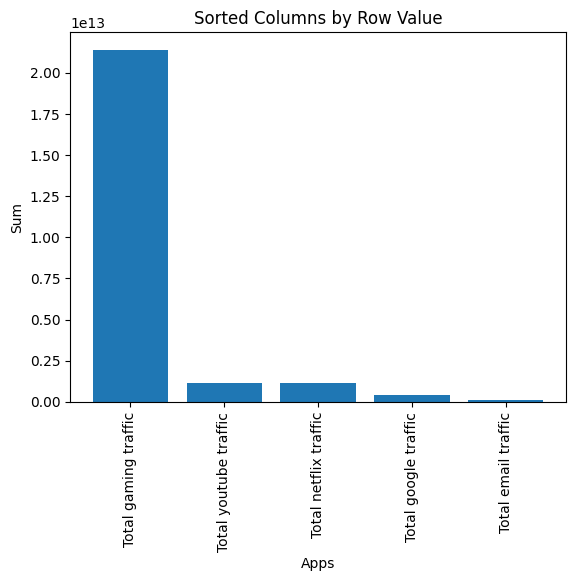

In [34]:
plt.bar(sorted_columns.columns, sorted_columns.values[0])
plt.xlabel('Apps')
plt.ylabel('Sum')
plt.title('Sorted Columns by Row Value')
plt.xticks(rotation=90)
plt.show()

Task 4 Experience analysis

Total  TCP Retransmission and total RTT

In [48]:
df.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


25306775.30242313
1000893.6867104284
